### 각 feature에 따른 천체 분류
- 각 지표를 종합해서 별, 은하, 퀘이사 중 하나로 예측하고 평가

### 🔎 데이터 세트 확인

In [1]:
import pandas as pd

st_df = pd.read_csv('./datasets/stellar_classification.csv')

st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [2]:
# 데이터 세트 정보 확인
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

### 💻 데이터 전처리

#### 결측치 및 중복 검사 

In [3]:
st_df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [4]:
# 데이터 중복 검사
st_df.duplicated().sum()

0

#### 중간 분석
- 이 데이터 세트에서는 결측치와 중복이 발견되지 않음
- 따라서 바로 target(class 컬럼)의 레이블 인코딩 진행

### 레이블 인코딩
- target(class 컬럼)에 담긴 문자열 데이터를 레이블 인코딩으로 정수화
- 이는 target과 나머지 feature들 사이의 상관관계도를 출력하기 위함

In [5]:
# 레이블 인코딩 전 데이터 세트 복사
pre_st_df = st_df.copy()

pre_st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [6]:
from sklearn.preprocessing import LabelEncoder

target_encoder = LabelEncoder()

# class에 레이블 인코딩을 적용한 값을 target 컬럼을 새로 만들어서 추가
pre_st_df['target'] = target_encoder.fit_transform(st_df['class'].tolist())

pre_st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,0


In [7]:
# 원본 데이터와 레이블 인코딩 후의 데이터 분포 비교
print(st_df['class'].value_counts())
print(pre_st_df['target'].value_counts())

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64
target
0    59445
2    21594
1    18961
Name: count, dtype: int64


In [8]:
# 필요없어진 class 컬럼은 제거
pre_st_df = pre_st_df.drop(labels=['class'], axis=1)

pre_st_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,target
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,0


In [9]:
# 인코더에 클래스 지정이 잘 되었는지 출력
target_encoder.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype='<U6')

### 👓 데이터 시각화

#### 타겟 데이터와의 상관관계 확인
- corr()을 이용하여 target과 각 컬럼의 상관관계도 확인
- 위 결과에 따라, 모델 학습에 불필요한 feature 제거

Text(0.5, 1.0, 'Correlation')

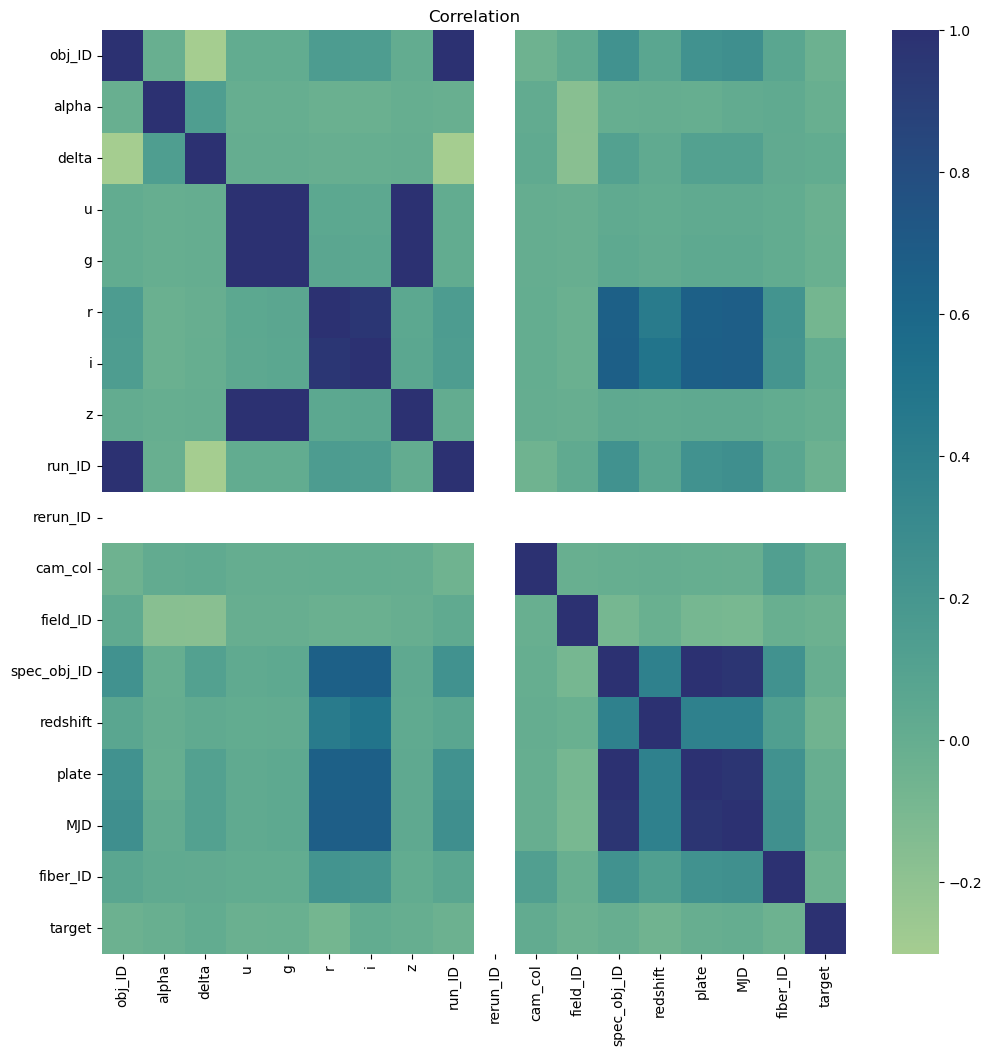

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 각 컬럼 간의 상관관계를 히트맵으로 출력
corr = pre_st_df.corr()
fig = plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr, cmap="crest")
heatmap.set_title("Correlation")

In [11]:
pd.set_option('display.max_rows', None)

# target과 feature들 사이의 상관관계를 데이터프레임 형식으로 출력
corr[['target']].sort_values(by="target", ascending=False)[1:]

,target
cam_col,0.023138
i,0.015028
delta,0.014452
MJD,-0.000405
z,-0.001614
plate,-0.010060
spec_obj_ID,-0.010060
alpha,-0.011756
g,-0.020066
u,-0.024645


In [12]:
# NaN의 상관관계를 보여준 rerun_ID의 데이터 분포 출력
pre_st_df['rerun_ID'].value_counts()

rerun_ID
301    100000
Name: count, dtype: int64

#### 중간 점검
- 단일값을 가지는 rerun_ID feature 제거
- 나머지 feature들은 target과 미약하게나마 상관관계를 가지고 있음
> - 만약 rerun_ID 외에도 상식적으로 천체 종류에 영향을 주지 않을 것 같은 feature들을 전부 제거하고 나면,  
target과 남은 feature들 사이의 상관관계에도 영향이 생길까?

### 불필요한 feature 제거
- rerun_ID 외에도 ~ID라고 적힌, 구분만을 위한 feature들은 전부 제거 후 상관관계 재확인

In [13]:
# fiber_ID의 데이터 분포 확인
pre_st_df['fiber_ID'].value_counts()

fiber_ID
637     159
105     158
597     158
611     154
321     154
621     151
564     149
409     148
563     148
571     146
411     146
333     145
639     144
57      144
365     144
601     143
95      143
351     142
439     142
523     142
389     142
101     142
481     141
269     141
123     140
565     140
340     140
599     140
557     140
559     140
277     140
619     140
293     140
264     139
475     139
175     139
531     138
197     138
581     138
525     138
189     138
325     138
533     137
391     137
529     136
539     136
626     136
363     136
503     136
285     135
379     135
323     135
487     135
455     135
593     135
399     135
3       135
400     135
572     134
310     134
613     134
457     134
540     134
562     134
598     134
341     134
276     134
311     134
631     134
412     134
97      134
255     133
577     133
257     133
235     133
459     132
117     132
297     132
201     132
55      132
401     132
47      132
515    

In [14]:
# field_ID의 데이터 분포 확인
pre_st_df['field_ID'].value_counts()

field_ID
71     472
65     458
67     449
60     448
69     447
72     446
68     445
74     442
81     442
125    436
58     433
64     431
70     430
77     430
62     430
83     428
110    428
73     427
98     427
112    427
109    425
61     424
88     423
94     421
51     420
53     420
91     418
66     418
113    418
63     417
111    417
118    415
84     414
85     411
101    411
114    411
97     410
59     410
75     409
89     407
100    405
104    405
79     403
119    402
87     398
136    397
56     397
82     397
86     397
96     397
50     396
133    396
49     396
92     395
103    395
123    393
76     393
108    391
116    391
117    390
115    390
102    389
78     389
122    385
124    385
120    384
54     384
131    384
121    383
55     383
52     383
126    381
143    379
90     378
135    378
39     378
132    378
48     375
144    375
41     375
57     371
105    371
154    370
99     369
37     369
46     369
128    368
95     368
145    365
141    365
9

#### 중간 점검
- 위 2가지 feature의 데이터 분포를 출력해본 건, 단순히 각 데이터를 구분하는 지표라면 제거하기 위함
- 하지만, 위 데이터들의 분포를 확인해봤을 때 특정 값이 여러 번 등장한 것을 확인
- 데이터 세트 업로더의 설명을 다시 확인하고 내린 추측으로는  
  위 데이터들은 특정 관측 장소나 각도를 구분하기 위한 지표인 것 같아 보였으며,  
  이는 같은 천체를 관측하더라도 판단에 영향을 줄 수 있는 지표라고 판단했기 때문에  
  위 2가지 feature들은 제거하지 않고 유지
- 비슷한 이유로 MJD feature 역시 제거하지 않고 유지

In [15]:
pd.set_option('display.max_rows', 10)

# 불필요한 feature를 파이썬 리스트 형태로 만들어서 변수에 할당
drop_columns = ['obj_ID', 'run_ID', 'rerun_ID', 'spec_obj_ID']

pre_st_df = pre_st_df.drop(labels=drop_columns, axis=1)

pre_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,79,0.634794,5812,56354,171,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,119,0.779136,10445,58158,427,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,120,0.644195,4576,55592,299,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,214,0.932346,9149,58039,775,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,137,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,581,0.000000,9374,57749,438,0
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,289,0.404895,7626,56934,866,0
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,308,0.143366,2764,54535,74,0
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,131,0.455040,6751,56368,470,0


#### 타겟 데이터와의 상관관계 재확인
- 불필요한 feature를 제거한 뒤, 각 컬럼 간의 상관관계에 변화가 생겼는지 확인

Text(0.5, 1.0, 'New Correlation')

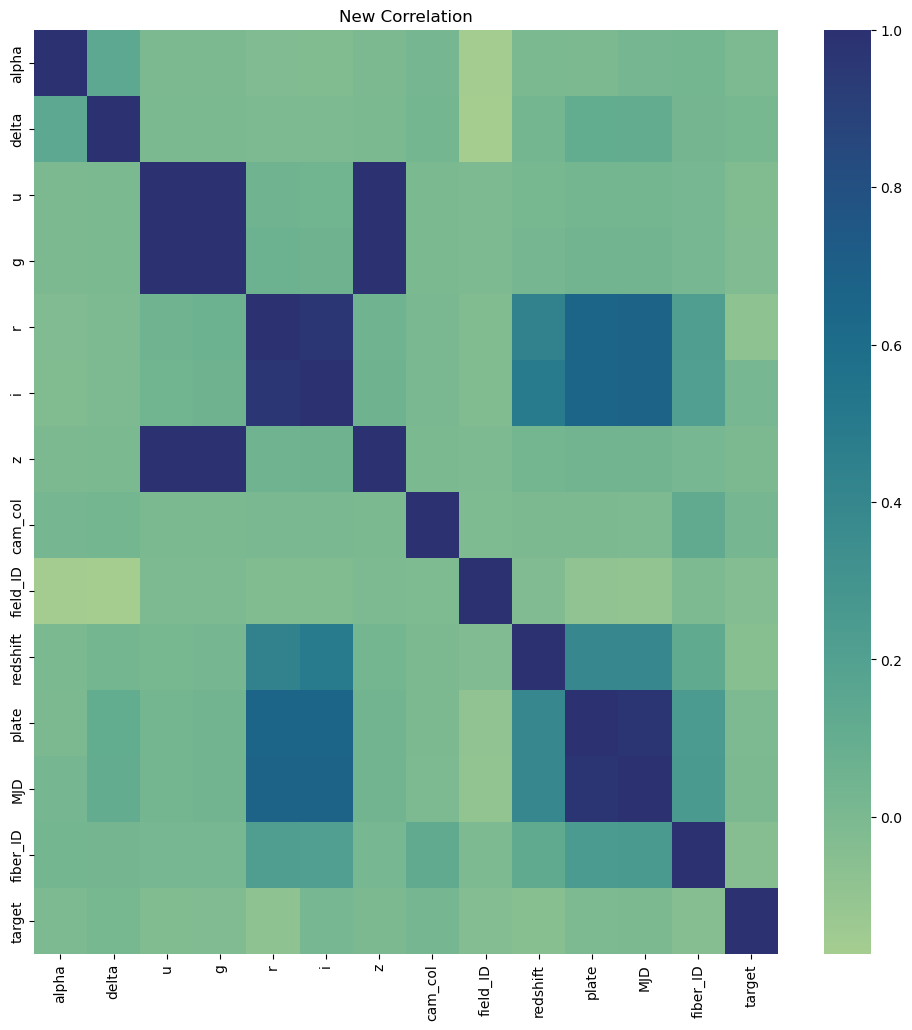

In [16]:
corr = pre_st_df.corr()
fig = plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr, cmap="crest")
heatmap.set_title("New Correlation")

In [17]:
pd.set_option('display.max_rows', None)

# target과 남은 feature들 사이의 상관관계를 데이터프레임 형식으로 출력
corr[['target']].sort_values(by="target", ascending=False)[1:]

,target
cam_col,0.023138
i,0.015028
delta,0.014452
MJD,-0.000405
z,-0.001614
plate,-0.010060
alpha,-0.011756
g,-0.020066
u,-0.024645
field_ID,-0.034833


#### 중간 분석
- 불필효한 feature들이 다른 feature들 사이의 상관관계에 영향을 미친다고 판단하여  
  해당 feature들을 제거했지만, target과의 상관관계에는 어떠한 변화도 없는 것을 확인
- 따라서 남은 데이터들의 분포를 시각화하고, 표준화로 이상치 제거

### 데이터 분포 시각화
- 각 컬럼의 데이터 분포를 히스토그램으로 시각화

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>,
        <Axes: title={'center': 'g'}>],
       [<Axes: title={'center': 'r'}>, <Axes: title={'center': 'i'}>,
        <Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'cam_col'}>],
       [<Axes: title={'center': 'field_ID'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'plate'}>,
        <Axes: title={'center': 'MJD'}>],
       [<Axes: title={'center': 'fiber_ID'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

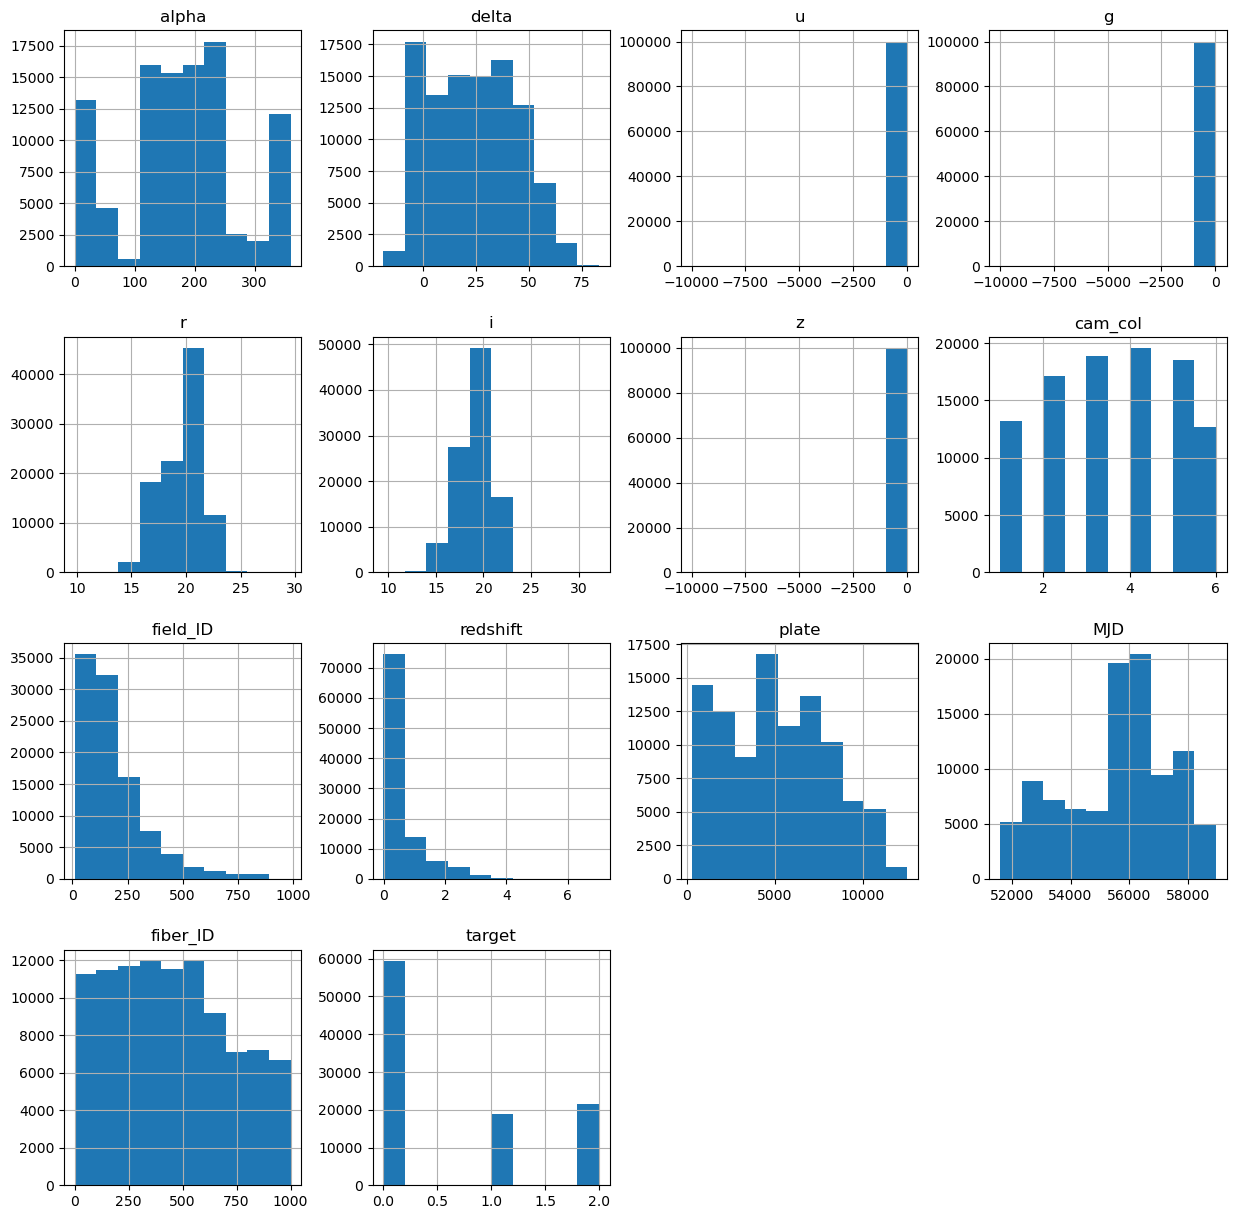

In [18]:
pre_st_df.hist(figsize=(15, 15))

### 이상치 제거
- feature들의 수치 데이터(평균, 최소/최대값, 사분위수 등) 확인
- 데이터 표준화 후 -1.96 ~ 1.96을 벗어나는 데이터 전부 제거

In [19]:
# 각 컬럼 별 수치 데이터 확인
pre_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,100000.0,177.629117,96.502241,0.005528,127.518222,180.900700,233.895005,359.999810
delta,100000.0,24.135305,19.644665,-18.785328,5.146771,23.645922,39.901550,83.000519
u,100000.0,21.980468,31.769291,-9999.000000,20.352353,22.179135,23.687440,32.781390
g,100000.0,20.531387,31.750292,-9999.000000,18.965230,21.099835,22.123767,31.602240
r,100000.0,19.645762,1.854760,9.822070,18.135828,20.125290,21.044785,29.571860
i,100000.0,19.084854,1.757895,9.469903,17.732285,19.405145,20.396495,32.141470
z,100000.0,18.668810,31.728152,-9999.000000,17.460677,19.004595,19.921120,29.383740
cam_col,100000.0,3.511610,1.586912,1.000000,2.000000,4.000000,5.000000,6.000000
field_ID,100000.0,186.130520,149.011073,11.000000,82.000000,146.000000,241.000000,989.000000
redshift,100000.0,0.576661,0.730707,-0.009971,0.054517,0.424173,0.704154,7.011245


In [20]:
from sklearn.preprocessing import StandardScaler 

pd.set_option('display.max_rows', 10)

# 데이터 표준화를 거진 feature들만 모아놓은 새로운 데이터프레임 생성
# 그 후, target 추가
std = StandardScaler()
std_st_features = std.fit_transform(pre_st_df.iloc[:, :-1])

std_st_df = pd.DataFrame(std_st_features, columns=pre_st_df.iloc[:, :-1].columns)
std_st_df['target'] = pre_st_df['target']

std_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,-0.952553,-0.718947,0.079557,0.228633,0.423203,-1.021342,0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.937920,-0.450509,0.277096,1.797924,1.420729,-0.081883,0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,-0.952553,-0.443798,0.092423,-0.190025,0.001854,-0.551612,0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,-0.322395,0.187031,0.486770,1.358942,1.354927,1.195196,0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.322395,-0.329712,-0.630267,0.333297,0.330860,1.441070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.430113,-1.360650,0.005890,0.076991,1.217564,1.263237,0.065144,-0.952553,2.649947,-0.789186,1.435155,1.194571,-0.041515,0
99996,-1.535053,-0.220744,0.022371,0.058422,0.433626,0.382696,0.023527,-1.582710,0.690351,-0.235069,0.843071,0.743915,1.529144,0
99997,0.486606,-0.429360,-0.025538,-0.039730,-0.777184,-0.793290,-0.041496,0.307763,0.817859,-0.592984,-0.803786,-0.582617,-1.377309,0
99998,0.358952,1.146631,0.106075,0.034840,0.144547,-0.007005,-0.001386,0.307763,-0.369978,-0.166444,0.546691,0.430945,0.075917,0


In [21]:
pd.set_option('display.max_rows', None)

# 표준화 완료 후의 수치 데이터 출력
std_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,100000.0,-3.970513e-16,1.000005,-1.840625,-0.519274,0.033902,0.583056,1.889817
delta,100000.0,1.173817e-16,1.000005,-2.184860,-0.966605,-0.024912,0.802575,2.996514
u,100000.0,2.279066e-17,1.000005,-315.431359,-0.051248,0.006253,0.053731,0.339982
g,100000.0,2.815526e-17,1.000005,-315.574464,-0.049328,0.017904,0.050154,0.348687
r,100000.0,4.587974e-16,1.000005,-5.296504,-0.814090,0.258540,0.754292,5.351716
i,100000.0,-2.325322e-15,1.000005,-5.469610,-0.769429,0.182202,0.746147,7.427453
z,100000.0,-4.646949e-17,1.000005,-315.735974,-0.038078,0.010583,0.039470,0.337712
cam_col,100000.0,-6.764367e-17,1.000005,-1.582710,-0.952553,0.307763,0.937920,1.568078
field_ID,100000.0,7.332801e-17,1.000005,-1.175291,-0.698814,-0.269314,0.368226,5.388012
redshift,100000.0,-3.993250e-17,1.000005,-0.802831,-0.714577,-0.208686,0.174480,8.806011


In [22]:
# 각 feature 별 이상치 개수 출력
std_features = std_st_df.iloc[:, :-1]

for column in std_features.columns:
    print(f'{column}: {std_st_df[~std_st_df[column].between(-1.96, 1.96)].shape[0]}건')

alpha: 0건
delta: 1926건
u: 1건
g: 1건
r: 3555건
i: 3270건
z: 1건
cam_col: 0건
field_ID: 5426건
redshift: 6256건
plate: 2597건
MJD: 2446건
fiber_ID: 1162건


In [23]:
# 각 feature 별 이상치 제거
for column in std_features.columns:
    std_st_df.drop(
        std_st_df[~std_st_df[column].between(-1.96, 1.96)].index, 
        axis=0, 
        inplace=True)

In [24]:
# 남은 이상치 개수가 0건인지 확인
for column in std_features.columns:
    print(f'{column}: {std_st_df[~std_st_df[column].between(-1.96, 1.96)].shape[0]}건')

alpha: 0건
delta: 0건
u: 0건
g: 0건
r: 0건
i: 0건
z: 0건
cam_col: 0건
field_ID: 0건
redshift: 0건
plate: 0건
MJD: 0건
fiber_ID: 0건


In [25]:
# 현재 데이터 세트 상태와 수치 데이터 확인
std_st_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78389 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     78389 non-null  float64
 1   delta     78389 non-null  float64
 2   u         78389 non-null  float64
 3   g         78389 non-null  float64
 4   r         78389 non-null  float64
 5   i         78389 non-null  float64
 6   z         78389 non-null  float64
 7   cam_col   78389 non-null  float64
 8   field_ID  78389 non-null  float64
 9   redshift  78389 non-null  float64
 10  plate     78389 non-null  float64
 11  MJD       78389 non-null  float64
 12  fiber_ID  78389 non-null  float64
 13  target    78389 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 9.0 MB


In [26]:
std_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,78389.0,0.038267,0.993903,-1.840625,-0.488556,0.049370,0.614953,1.889817
delta,78389.0,0.021049,0.959239,-1.958568,-0.860517,0.043967,0.809668,1.959824
u,78389.0,0.008726,0.068067,-0.210837,-0.046672,0.011545,0.057805,0.231205
g,78389.0,0.007574,0.059958,-0.155575,-0.044354,0.021306,0.052582,0.348687
r,78389.0,0.037254,0.909390,-1.959963,-0.734057,0.264228,0.734987,1.957998
i,78389.0,0.016685,0.895232,-1.959947,-0.695872,0.165583,0.668625,1.958805
z,78389.0,0.003960,0.050330,-0.130609,-0.034169,0.009459,0.036061,0.337712
cam_col,78389.0,-0.005383,0.998856,-1.582710,-0.952553,0.307763,0.937920,1.568078
field_ID,78389.0,-0.178451,0.694670,-1.175291,-0.725658,-0.323001,0.207163,1.958720
redshift,78389.0,-0.176907,0.615055,-0.802831,-0.715117,-0.236904,0.075636,1.959881


In [27]:
pd.set_option('display.max_rows', 10)

std_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,-0.434604,0.425529,0.059755,0.054926,0.403962,0.046007,0.003937,-0.952553,-0.718947,0.079557,0.228633,0.423203,-1.021342,0
1,-0.339921,0.363402,0.088045,0.072456,1.584406,1.185097,0.092835,0.937920,-0.450509,0.277096,1.797924,1.420729,-0.081883,0
2,-0.367251,0.582713,0.103327,0.067165,0.519745,0.150019,0.008808,-0.952553,-0.443798,0.092423,-0.190025,0.001854,-0.551612,0
3,1.669523,-1.249105,0.004921,0.102210,1.059904,0.807610,0.018321,-0.322395,0.187031,0.486770,1.358942,1.354927,1.195196,0
4,1.737310,-0.150242,-0.080055,-0.092948,-1.697421,-1.767887,-0.098468,-0.322395,-0.329712,-0.630267,0.333297,0.330860,1.441070,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1.446791,-1.263329,-0.031956,-0.022524,-0.163851,0.035415,0.012263,-0.952553,-0.819611,-0.549408,-1.392821,-1.299242,-1.461714,0
99996,-1.535053,-0.220744,0.022371,0.058422,0.433626,0.382696,0.023527,-1.582710,0.690351,-0.235069,0.843071,0.743915,1.529144,0
99997,0.486606,-0.429360,-0.025538,-0.039730,-0.777184,-0.793290,-0.041496,0.307763,0.817859,-0.592984,-0.803786,-0.582617,-1.377309,0
99998,0.358952,1.146631,0.106075,0.034840,0.144547,-0.007005,-0.001386,0.307763,-0.369978,-0.166444,0.546691,0.430945,0.075917,0


In [28]:
# pre_st_df에서 이상치가 발생한 행 제거
pre_st_df = pre_st_df.iloc[std_st_df.index].reset_index(drop=True)

pre_st_df

,alpha,delta,u,g,r,i,z,cam_col,field_ID,redshift,plate,MJD,fiber_ID,target
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,79,0.634794,5812,56354,171,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,119,0.779136,10445,58158,427,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,120,0.644195,4576,55592,299,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,214,0.932346,9149,58039,775,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,137,0.116123,6121,56187,842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78384,317.246996,-0.682254,20.96526,19.81625,19.34186,19.14711,19.05790,2,64,0.175206,1025,53239,51,0
78385,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,289,0.404895,7626,56934,866,0
78386,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,308,0.143366,2764,54535,74,0
78387,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,131,0.455040,6751,56368,470,0


In [30]:
pd.set_option('display.max_rows', None)

# 현재 수치 데이터 확인
pre_st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
alpha,78389.0,181.321917,95.913399,0.005528,130.482624,182.393393,236.973181,359.999810
delta,78389.0,24.548796,18.843834,-14.339922,7.230830,24.999021,40.040891,62.635199
u,78389.0,22.257682,2.162439,15.282360,20.497750,22.347230,23.816880,29.325650
g,78389.0,20.771858,1.903683,15.591850,19.123140,21.207860,22.200860,31.602240
r,78389.0,19.714859,1.686692,16.010520,18.284270,20.135840,21.008980,23.277360
i,78389.0,19.114185,1.573717,15.639490,17.861590,19.375930,20.260220,22.528210
z,78389.0,18.794448,1.596865,14.524850,17.584690,18.968920,19.812940,29.383740
cam_col,78389.0,3.503068,1.585089,1.000000,2.000000,4.000000,5.000000,6.000000
field_ID,78389.0,159.539425,103.512994,11.000000,78.000000,138.000000,217.000000,478.000000
redshift,78389.0,0.447394,0.449423,-0.009971,0.054122,0.403554,0.631929,2.008753


In [31]:
# 현재 target의 분포 출력
pre_st_df['target'].value_counts()

target
0    50144
2    17608
1    10637
Name: count, dtype: int64

#### 중간 분석
- 이상치 제거 완료
- 단, target의 데이터 분포가 0(GALAXY)에 치우쳐있기 때문에,  
  아래의 데이터 세트 분할 과정에서 SMOTE를 통한 오버 샘플링 실행

### 데이터 세트 분할

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 세트를 학습용과 테스트용으로 분할
features, targets = pre_st_df.iloc[:, :-1], pre_st_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
                        train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# SMOTE로 오버 샘플링 실행
smote = SMOTE(random_state=124)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# SMOTE 적용 전후의 데이터 분포 출력
print(f'SMOTE 적용 전:\n{y_train.value_counts()}')
print(f'SMOTE 적용 후:\n{y_train_over.value_counts()}')

SMOTE 적용 전:
target
0    40115
2    14086
1     8510
Name: count, dtype: int64
SMOTE 적용 후:
target
0    40115
2    40115
1    40115
Name: count, dtype: int64


### 학습 진행
- 여러 가지 분류 모델을 통한 학습 진행

> 1. DTC (DecisionTreeClassifier)
>> - graphviz로 알고리즘 시각화  
시각화로 max_depth와 min_samples_split 결정하고 교차검증(GridSearchCV) 진행  
이후 오차 행렬, Precision / Recall Trade-off, ROC Curve 출력 및 시각화  
만약 성능 이상이 발생하면 데이터 표준화 후 이상치 제거해서 재측정

> 2. SVM (SVC)

> 3. KNN (KNeighborsClassifier)

### 1. DTC (결정 트리 분류 모델)

In [33]:
from sklearn.tree import DecisionTreeClassifier

# 우선, 별도의 하이퍼 파라미터 설정 없이 학습 진행
dtc = DecisionTreeClassifier()

dtc.fit(X_train_over, y_train_over)

DecisionTreeClassifier()

In [35]:
from sklearn.tree import export_graphviz

# graphviz를 이용하여 위 모델의 분류 알고리즘을 .dot 파일로 생성
export_graphviz(
    dtc,
    out_file="./images/stellar_dtc01.dot",
    class_names=target_encoder.classes_,
    feature_names=features.columns,
    impurity=True,
    filled=True
)

In [36]:
import graphviz

# 위 과정으로 생성된 .dot 파일 불러오기
with open('./images/stellar_dtc01.dot') as f:
    stellar_dtc01 = f.read()

stellar_dtc01_graph = graphviz.Source(stellar_dtc01)

In [37]:
# 불러온 파일을 .png로 저장
stellar_dtc01_graph.render(filename='stellar_dtc01', directory='./images', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.247844 to fit


'images\\stellar_dtc01.png'

<img src='./images/stellar_dtc01.png'>

#### 중간 분석
- 분류 알고리즘이 너무 복잡하고, 이미지를 확대해도 텍스트가 뚜렷하지 않아서 하이퍼 파라미터를 설정하기 어려움
- 첫 교차 검증 시, max_depth는 16, 17, 18, 19, 20 / min_samples_split은 2500, 5000, 7500, 10000, 12500, 15000으로 설정

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 교차 검증 파라미터 설정
dtc_parameters = {
    'max_depth': [16, 17, 18, 19, 20],
    'min_samples_split': [2500, 5000, 7500, 10000, 12500, 15000]
}

dtc = DecisionTreeClassifier()

# 교차검증이 적용된 새로운 결정 트리 분류 모델 생성
g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)

g_dtc.fit(X_train_over, y_train_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [16, 17, 18, 19, 20],
                         'min_samples_split': [2500, 5000, 7500, 10000, 12500,
                                               15000]},
             return_train_score=True)

In [40]:
# 하이퍼 파라미터 조합 별 평가 점수 및 순위를 데이터프레임에 담아서 출력
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

display(dtc_result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 16, 'min_samples_split': 2500}",0.952719,4
1,"{'max_depth': 16, 'min_samples_split': 5000}",0.949512,6
2,"{'max_depth': 16, 'min_samples_split': 7500}",0.949512,6
3,"{'max_depth': 16, 'min_samples_split': 10000}",0.925340,16
4,"{'max_depth': 16, 'min_samples_split': 12500}",0.920902,21
5,"{'max_depth': 16, 'min_samples_split': 15000}",0.919440,26
6,"{'max_depth': 17, 'min_samples_split': 2500}",0.952719,4
7,"{'max_depth': 17, 'min_samples_split': 5000}",0.949512,6
8,"{'max_depth': 17, 'min_samples_split': 7500}",0.949512,6
9,"{'max_depth': 17, 'min_samples_split': 10000}",0.925340,16


In [41]:
# 평가 순쉬가 가장 높은 하이퍼 파라미터의 조합 출력
for params in dtc_result_df[dtc_result_df['rank_test_score'] == 1]['params']:
    print(params)

{'max_depth': 18, 'min_samples_split': 2500}
{'max_depth': 19, 'min_samples_split': 2500}
{'max_depth': 20, 'min_samples_split': 2500}


In [43]:
# 가장 좋은 평가 점수를 받은 하이퍼 파라미터로 튜닝한 모델을 dtc에 할당
dtc = g_dtc.best_estimator_

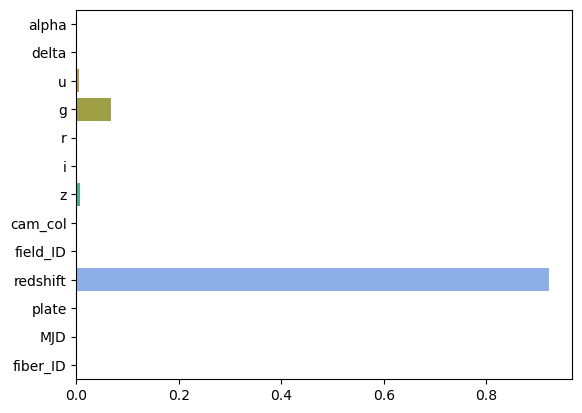

In [44]:
# 각 feature가 target에 미치는 영향을 바 플롯으로 시각화
sns.barplot(x=dtc.feature_importances_, y=features.columns)
plt.show()

In [46]:
from sklearn.inspection import permutation_importance

# 각 feature가 target에 미치는 영향의 정도를 출력
importance = permutation_importance(dtc, X_test, y_test, n_repeats=30, random_state=124)
importance.importances_mean.argsort()[::-1]

array([ 9,  2,  6,  3,  5, 11,  4,  1, 12, 10,  8,  7,  0], dtype=int64)

In [48]:
# 각 컬럼 별 중요도 출력
for i in importance.importances_mean.argsort()[::-1]:
    print(f'{features.columns[i]}: {round(importance.importances_mean[i], 4)}')

redshift: 0.4971
u: 0.1096
z: 0.0888
g: 0.0564
i: 0.0229
MJD: 0.0095
r: 0.0024
delta: 0.0
fiber_ID: 0.0
plate: 0.0
field_ID: 0.0
cam_col: 0.0
alpha: 0.0


- 'redshift'가 target에 압도적으로 많은 영향을 미치는 것을 확인
- feature_importance의 경우, 그 다음으로 가장 영향이 큰 것은 'g'이지만
  이는 'redshift'의 1/10 정도 되는 미미한 수준인 것으로 보임
- permutation_importance의 경우, 위와는 달리 'u'의 영향이 크다는 결과를 보임.  
  이는 'u'가 다른 feature들과의 상관관계가 높다는 것을 의미하며, 이는 위의 히트맵에서 확인할 수 있음

#### 산점도와 분류 영역을 시각화
- 이를 통해 현재 모델의 과적합 정도를 확인

In [64]:
import numpy as np

# 데이터의 분포를 산점도로 시각화하고, 모델이 해당 데이터를 분류한 경계와 각 데이터들의 영역을 시각화하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X.values, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           zorder=1)

In [68]:
pd.set_option('display.max_rows', 10)

# feature_importance에서 가장 높은 중요도를 가진 feature 2가지만 가져옴
important_features = features.iloc[:, [3, 9]]

important_features

,g,redshift
0,22.27530,0.634794
1,22.83188,0.779136
2,22.66389,0.644195
3,23.77656,0.932346
4,17.58028,0.116123
...,...,...
78384,19.81625,0.175206
78385,22.38628,0.404895
78386,19.26997,0.143366
78387,21.63757,0.455040


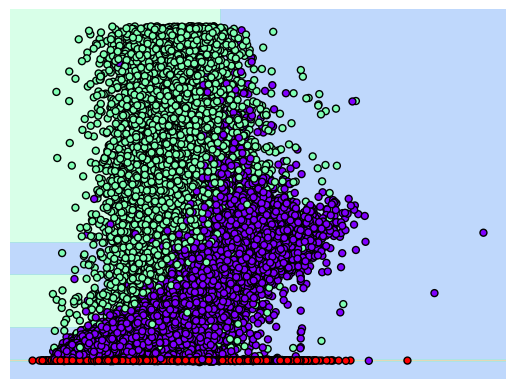

In [71]:
visualize_boundary(dtc, important_features, targets)

#### 데이터가 너무 많아서 산점도로 과적합 여부 확인 불가
- get_evaluation 함수 그대로 가져와서 오차행렬 시각화하고
- 하이퍼 파라미터에서 depth 낮추고(11~15) split늘려서(15000~25000) 2차 사이클 돌려볼 것

#### 1st Cycle
- 